<a href="https://colab.research.google.com/github/jinyoungmoonDEV/Academy_Python_MachineLearning/blob/main/%EB%B9%84%ED%8A%B82205_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [ ]:
path = '/content/Fish.csv'

In [ ]:
import pandas as pd
fish = pd.read_csv(path)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length2','Length3','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input,train_target,test_target =\
  train_test_split(fish_input,fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.7983193277310925
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [ ]:
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]]


In [ ]:
print(test_scaled[3])
print(test_scaled[3:4])

[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]


In [ ]:
_,indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch' 'Perch' 'Perch']]


In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
xs = [x for x in np.arange(-100,100,0.1)]
ys = [sigmoid(x) for x in xs]

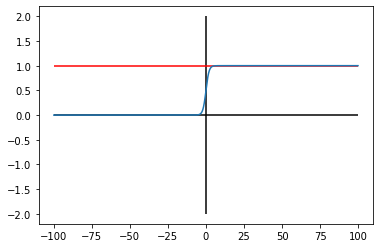

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.vlines(0,-2,2)
plt.hlines(0,-100,100)
plt.hlines(1,-100,100,colors='r')
plt.show()

In [ ]:
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes2 = (test_target == 'Bream')|(test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes2]
test_target_bream_smelt = test_target[bream_smelt_indexes2]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
lr.predict(test_bream_smelt)

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [ ]:
print(test_target_bream_smelt)

['Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(test_bream_smelt[:5])
print(decisions)

[ 3.18937919 -7.44860256  3.63251459 -5.12544773 -5.0766189 ]


In [ ]:
for d in decisions:
  print(f'{sigmoid(d):.2f}',end=' ')

0.96 0.00 0.97 0.01 0.01 

In [ ]:
res = lr.predict(test_bream_smelt[:5])
print(res)

['Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


# 로지스틱 회귀를 이용한 다중 분류

In [ ]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]]


In [ ]:
print(lr.intercept_)

[-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 경사하강법 모델

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [ ]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9159663865546218
0.925


In [ ]:
import numpy as np
sc = SGDClassifier()
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled,test_target))

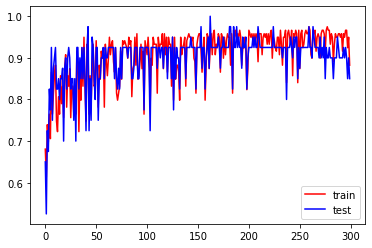

In [ ]:
plt.plot(train_score,'r',label='train')
plt.plot(test_score,'b',label='test')
plt.legend()
plt.show()

In [ ]:
path = '/content/wine2.csv'
wine = pd.read_csv(path)
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine['class'].unique()

array([0., 1.])

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
data.shape, target.shape

((6497, 3), (6497,))

In [ ]:
train_input, test_input, train_target, test_target =\
  train_test_split(data,target,test_size=0.2)
train_input.shape,test_input.shape

((5197, 3), (1300, 3))

In [ ]:
#ss = StandardScaler()
#ss.fit(train_input)
#train_scaled = ss.transform(train_input)
#test_scaled = ss.transform(test_input)

In [ ]:
train_scaled = train_input#스케일조절 한 척
test_scaled = test_input

In [ ]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7833365403117183
0.7630769230769231


In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_,lr.intercept_)

0.7833365403117183
0.7630769230769231
[[ 0.44681398  0.35229744 -4.17230108]] [8.60894036]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=48)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996728882047335
0.8569230769230769


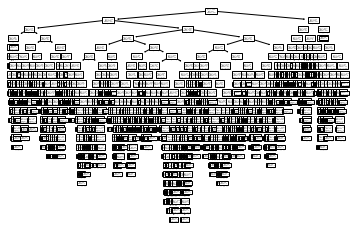

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

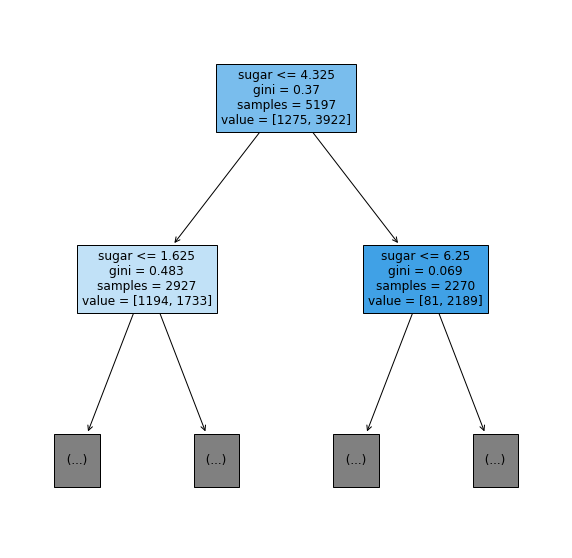

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8483740619588224
0.8307692307692308


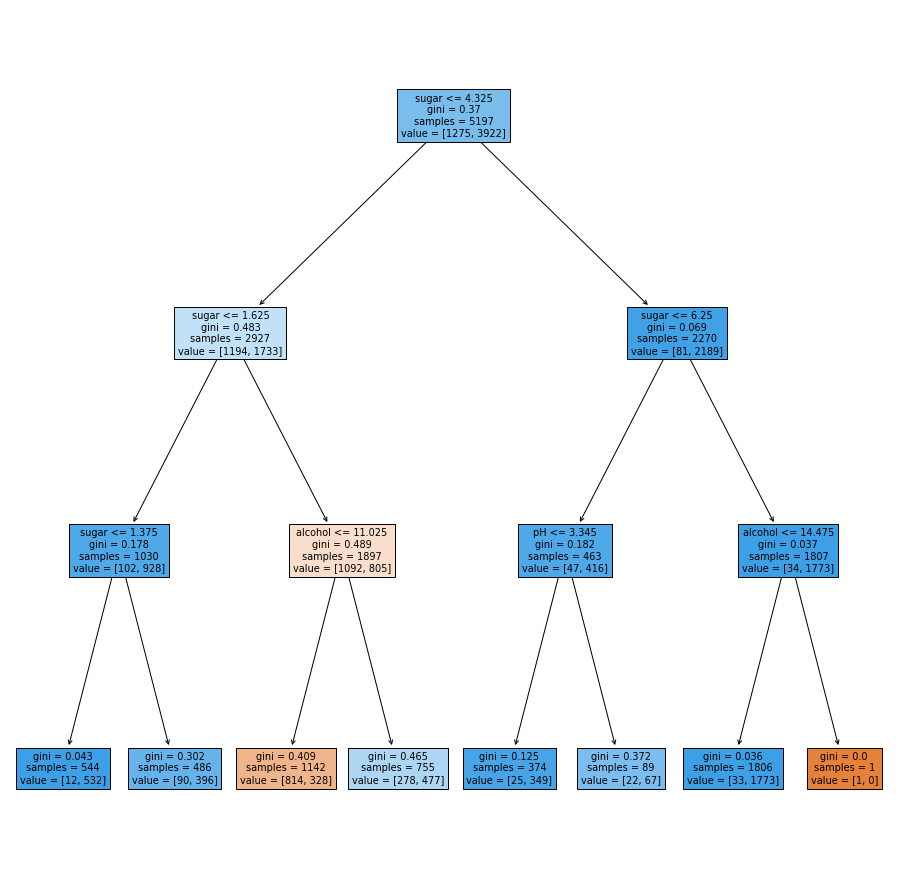

In [ ]:
plt.figure(figsize=(16,16))
plot_tree(dt, filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.13891226 0.85517425 0.00591349]


In [ ]:
sub_input, val_input, sub_target,val_target =\
  train_test_split(train_input,train_target)

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))
print(dt.score(test_input,test_target))

0.8822170900692841
0.8576923076923076
0.8484615384615385


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.02]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input,test_target))

0.9630556090051953
0.8684615384615385


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86780799 0.86473125 0.85164359 0.7546661  0.83201803]


In [ ]:
params = {
    'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.02],
    'max_depth':range(5,20),
    'min_samples_split':range(2,100,10)
}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(),params)
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(dt.score(test_input,test_target))

0.9613238406773138
0.8692307692307693


In [ ]:
print(gs.best_params_)

{'max_depth': 17, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


# 앙상블

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_validate(rf,train_input,train_target,return_train_score=True)
print(scores)

{'fit_time': array([0.9721384 , 0.93618298, 0.91349673, 0.61273789, 0.47941613]), 'score_time': array([0.1012733 , 0.08636618, 0.03233099, 0.04869556, 0.04518604]), 'test_score': array([0.89519231, 0.8875    , 0.89027911, 0.89316651, 0.89124158]), 'train_score': array([0.99735386, 0.9971133 , 0.996152  , 0.997114  , 0.9973545 ])}


In [ ]:
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9970175308881106 0.8914759013844673


In [ ]:
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.23208775 0.49675753 0.27115472]


In [ ]:
print(rf.score(train_input, train_target))
print(rf.score(test_input,test_target))

0.9965364633442371
0.8892307692307693
